In [1]:
import sys
sys.path.append('..')
import torch
import torchvision
from bable.datasets.zappos_dataset import ZapposV1, ZapposV2, ZapposPredictDataset
from bable.datasets.lfw10_dataset import LFW10Dataset, LFW10PredictDataset
import matplotlib.pyplot as plt
training = True
default_trans_config = {
    # ToTensor
    "is_rgb": True,

    # ColorJitter
    "color_jitter": training,
    "brightness": .1,
    "contrast": .1,
    "saturation": .1,
    "hue": .1,

    # RandomHorizontalFlip
    "random_horizontal_flip": training,

    # RandomResizedCrop
    "random_resized_crop_size": (224, 224) if training else None,
    "random_resized_crop_scale": (0.75, 1.),
    "random_resized_crop_ratio": (3.0 / 4, 4.0 / 3),

    # Resize
    "resize_size": None if training else (256, 256),
}

In [2]:
def test_siamese_dataset(fn, split, category_id, trans_config=default_trans_config, num_imgs=2):
    dataset = fn(split, category_id, trans_config=trans_config)
    print(dataset.category_name)
    for i in range(num_imgs):
        img, label = dataset[i]
        print(label)
        ax1 = plt.subplot(121)
        ax1.imshow(img[0].numpy().transpose([1, 2, 0]))
        ax2 = plt.subplot(122)
        ax2.imshow(img[1].numpy().transpose([1, 2, 0]))
        plt.show()

def test_siamese_dataloader(fn, split, category_id, trans_config=default_trans_config, num_imgs=2):
    dataset = fn(split, category_id, trans_config=trans_config)
    print(dataset.category_name)
    loader = torch.utils.data.DataLoader(dataset, batch_size=16, num_workers=10)
    cnt = 0
    for data in loader:
        # data[0] 是长度为2的list，list中每个元素shape为 [batch_size, channels, img_height, img_width]
        # data[1] 是labels，shape为[batch]
        img1 = data[0][0]
        img2 = data[0][1]
        labels = data[1]
        print(labels[0])
        ax1 = plt.subplot(121)
        ax1.imshow(img1[0].numpy().transpose([1, 2, 0]))
        ax2 = plt.subplot(122)
        ax2.imshow(img2[1].numpy().transpose([1, 2, 0]))
        plt.show()
        cnt += 1
        if cnt >= num_imgs:
            break

def test_predict_dataset(fn, num_imgs=2):
    dataset = fn()
    for i in range(2):
        full_path, img = dataset[i]
        print(full_path, img.shape)
        plt.imshow(img.numpy().transpose([1, 2, 0]))
        plt.show()

sporty
-1


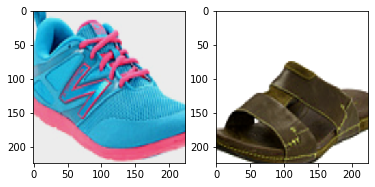

-1


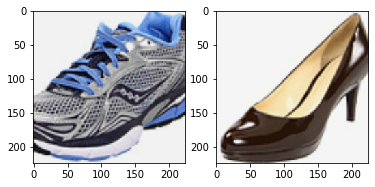

sporty
tensor(1)


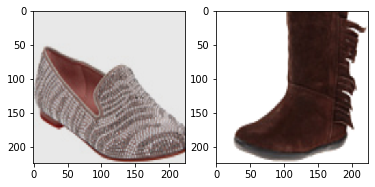

tensor(1)


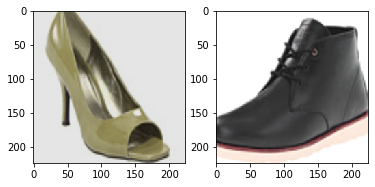

/hdd02/zhangyiyang/data/zap50k/ut-zap50k-images/Shoes/Oxfords/Bostonian/100627.72.jpg torch.Size([3, 224, 299])


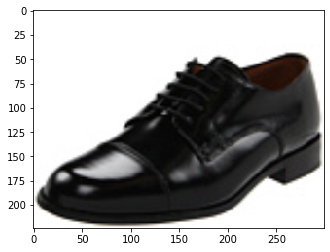

/hdd02/zhangyiyang/data/zap50k/ut-zap50k-images/Shoes/Oxfords/Bostonian/100627.255.jpg torch.Size([3, 224, 299])


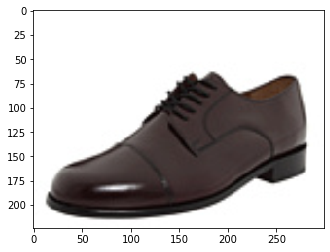

In [3]:
test_siamese_dataset(ZapposV1, 'test', 2)
test_siamese_dataloader(ZapposV2, 'test', 2)
test_predict_dataset(ZapposPredictDataset)

eyesopen
1


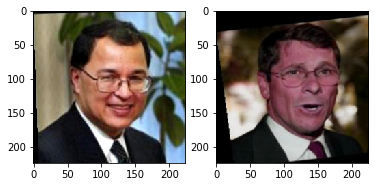

-1


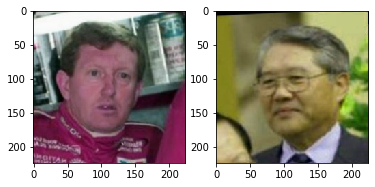

eyesopen
tensor(1)


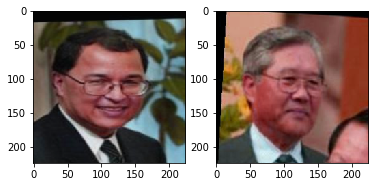

tensor(1)


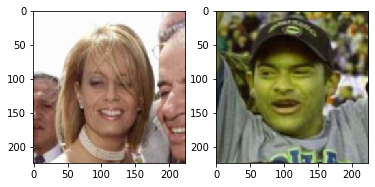

/hdd02/zhangyiyang/data/LFW10/images/363.jpg torch.Size([3, 250, 250])


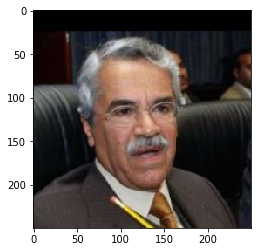

/hdd02/zhangyiyang/data/LFW10/images/1975.jpg torch.Size([3, 250, 250])


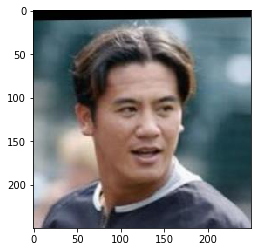

In [4]:
test_siamese_dataset(LFW10Dataset, 'test', 2)
test_siamese_dataloader(LFW10Dataset, 'test', 2)
test_predict_dataset(LFW10PredictDataset)